TP Siluroformes de Benjamin Forestier

<Axes: xlabel='Date'>

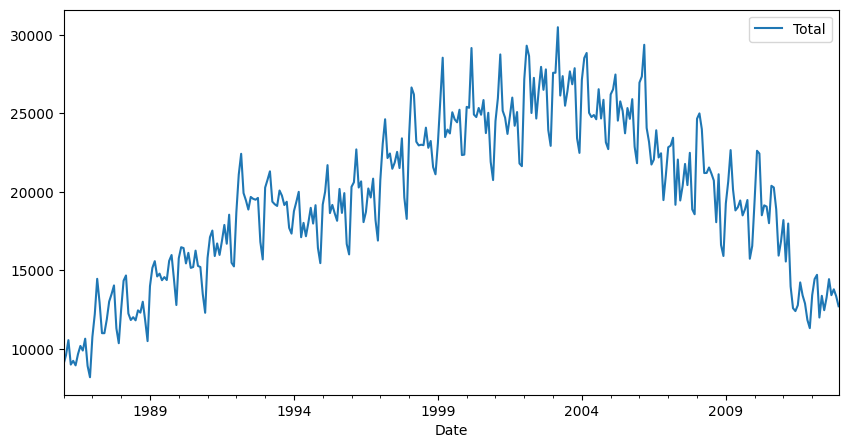

In [3]:
import pandas
import matplotlib.pyplot as plt

siluriforme = pandas.read_csv('catfish.csv', index_col='Date', parse_dates=True)
siluriforme.head(1)
siluriforme.tail(-1)

plt.rcParams["figure.figsize"] = (10, 5)
siluriforme.plot()

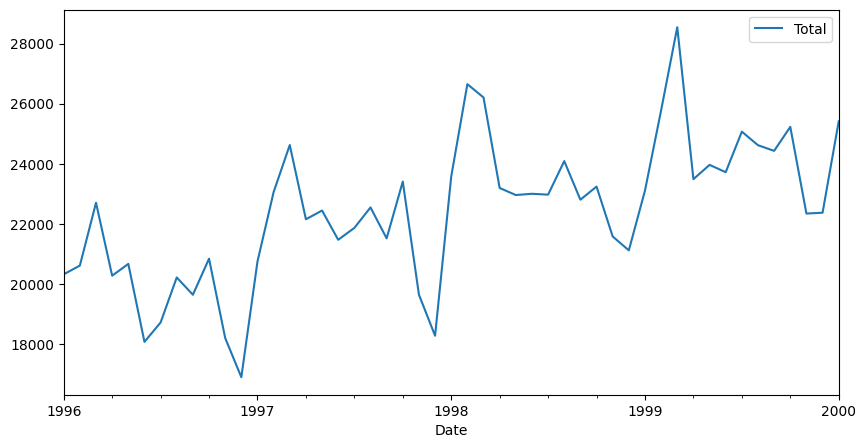

In [4]:
subset = siluriforme.loc['1996-1-01':'2000-1-01'] # Exemple : de janvier à juin 2023
subset.plot()
plt.show()


Moyennes des ventes :

In [5]:
import numpy as np

# Année 92
year = siluriforme.loc['1992']
print(f"1992 : {np.mean(year)}")

# Décennie 90
decade = siluriforme.loc['1990-1-01':'1999-12-31']
print(f"90 : {np.mean(decade)}")

# Ensemble du dataset
print(f"Dataset : {np.mean(siluriforme)}")

1992 : 19278.0
90 : 19701.808333333334
Dataset : 19643.984567901236


Médianne des ventes :

In [ ]:
# Année 92
year = siluriforme.loc['1992']
print(f"1992 : {np.median(year)}")

# Décennie 90
decade = siluriforme.loc['1990-1-01':'1999-12-31']
print(f"90 : {np.median(decade)}")

# Ensemble du dataset
print(f"Dataset : {np.median(siluriforme)}")

19529.5
19477.0
19660.5


Mode des ventes :

In [27]:
# Année 1992
year = siluriforme.loc['1992']
value_counts_year = year["Total"].value_counts()
modes = year["Total"].mode()
print("Année 1992 :")
for mode in modes:
    print(f"{mode} apparaît {value_counts_year[mode]} fois")
# print(year["Total"].mode)

# Décennie 90
decade = siluriforme.loc['1990-1-01':'1999-12-31']
value_counts_decade = decade["Total"].value_counts()
modes = decade["Total"].mode()
print("Décennie 90 :")
for mode in modes:
    print(f"{mode} apparaît {value_counts_decade[mode]} fois")
# print(decade["Total"].mode)

# Ensemble du dataset
value_counts_dataset = siluriforme["Total"].value_counts()
modes = siluriforme["Total"].mode()
print("Ensemble du dataset :")
for mode in modes:
    print(f"{mode} apparaît {value_counts_dataset[mode]} fois")
# print(siluriforme["Total"].mode)

Année 1992 :
15698 apparaît 1 fois
16814 apparaît 1 fois
18698 apparaît 1 fois
18874 apparaît 1 fois
19454 apparaît 1 fois
19500 apparaît 1 fois
19559 apparaît 1 fois
19615 apparaît 1 fois
19676 apparaît 1 fois
19923 apparaît 1 fois
21100 apparaît 1 fois
22425 apparaît 1 fois
Décennie 90 :
12300 apparaît 1 fois
13488 apparaît 1 fois
15158 apparaît 1 fois
15212 apparaît 1 fois
15214 apparaît 1 fois
15253 apparaît 1 fois
15287 apparaît 1 fois
15444 apparaît 1 fois
15461 apparaît 1 fois
15486 apparaît 1 fois
15698 apparaît 1 fois
15771 apparaît 1 fois
15794 apparaît 1 fois
15914 apparaît 1 fois
15983 apparaît 1 fois
16018 apparaît 1 fois
16118 apparaît 1 fois
16257 apparaît 1 fois
16420 apparaît 1 fois
16427 apparaît 1 fois
16476 apparaît 1 fois
16680 apparaît 1 fois
16697 apparaît 1 fois
16716 apparaît 1 fois
16814 apparaît 1 fois
16878 apparaît 1 fois
16898 apparaît 1 fois
17112 apparaît 1 fois
17113 apparaît 1 fois
17173 apparaît 1 fois
17342 apparaît 1 fois
17536 apparaît 1 fois
17709

On peut en conclure qu'il n'y a jamais exactement la même quantité de siluriformes bien que les valeurs tournent autour des 15000, 18000 et 19000.

Ecart-type des ventes :

In [8]:
# Année 1992
year = siluriforme.loc['1992']
print(f"L'écart-type pour l'année 1992 est : {year.std()}")

# Décennie 90
decade = siluriforme.loc['1990-1-01':'1999-12-31']
print(f"L'écart-type pour la décennie 90 est : {decade.std()}")

# Ensemble du dataset
print(f"L'écart-type pour l'ensemble du dataset est : {siluriforme.std()}")

L'écart-type pour l'année 1992 est : Total    1744.024187
dtype: float64
L'écart-type pour la décennie 90 est : Total    3063.095165
dtype: float64
L'écart-type pour l'ensemble du dataset est : Total    5039.324331
dtype: float64


Série stationnaire ?

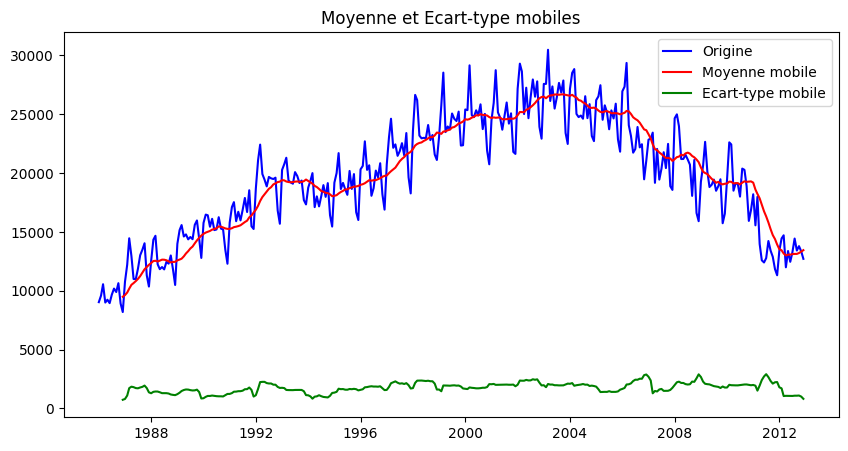

In [9]:
rolling_mean = siluriforme.rolling(window=12).mean()
rolling_std = siluriforme.rolling(window=12).std()

plt.plot(siluriforme, color='b', label='Origine')
plt.plot(rolling_mean, color='r', label='Moyenne mobile')
plt.plot(rolling_std, color='g', label='Ecart-type mobile')
plt.legend(loc='best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

On pouvait déjà s'en rendre compte avec le graphique de la question 2 représentant la courbe des ventes. Mais les statistiques roulantes augmentant et diminuant avec le temps nous prouve bel et bien que cette série temporelle n'est pas stationnaire.

Saisonnalité ?

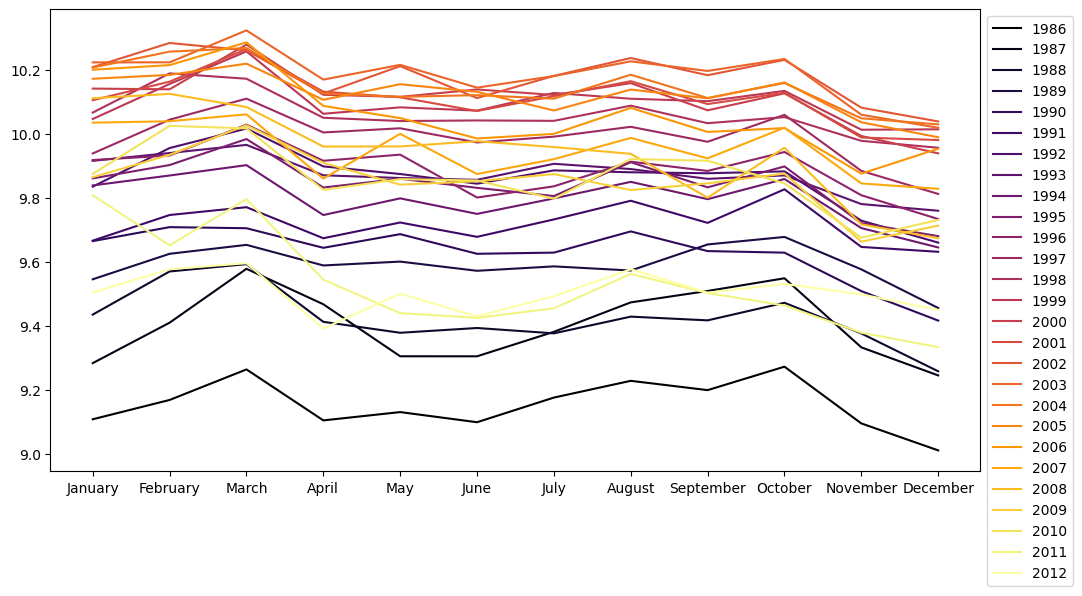

In [10]:
log_siluriforme = np.log(siluriforme)
plt.figure(figsize=(12, 6))

years = [str(year) for year in log_siluriforme.index.year.unique()]
months = log_siluriforme.index.month_name().unique()
colors = plt.cm.inferno(np.linspace(0, 1, len(years)))

for index, year in enumerate(years):
    plt.plot(months, log_siluriforme.loc[year], label=year, color = colors[index])
    plt.legend(bbox_to_anchor=(1, 1))

On peut en effet voir ce qui ressemble à une saisonnalité annuelle, le grapahique ci-dessus le montre, bien qu'a partir des années 2006 - 2007 les courbes se déforme un peu mais puisque les ventes s'effondrent mais en gardant une certaine forme de saisonnalité.

Tendance ?

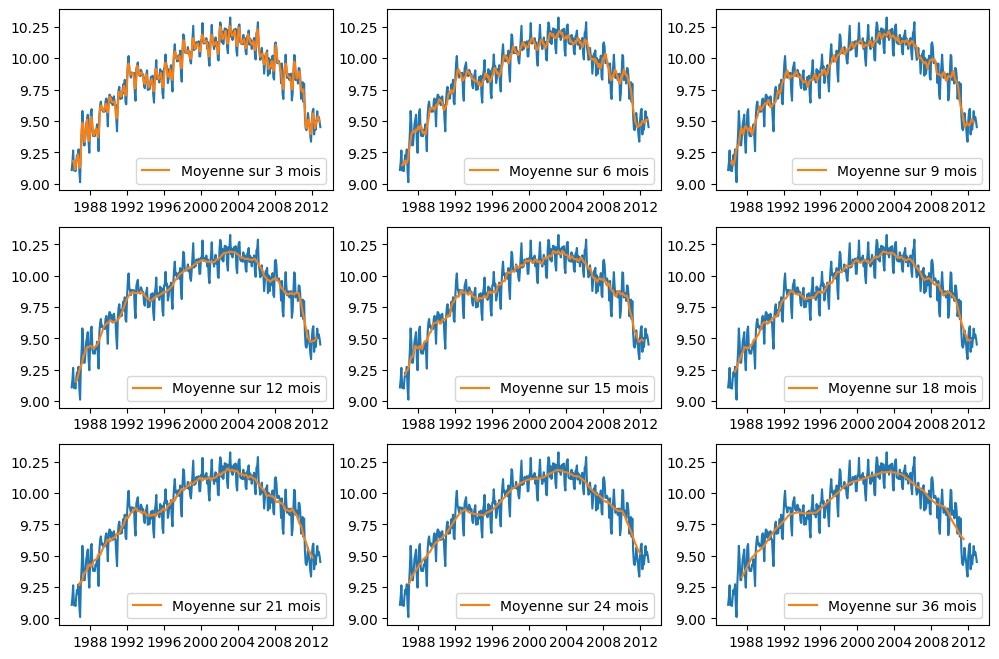

In [11]:
windows = list(range(3, 25, 3)) + [36]
fig = plt.figure(figsize=(12, 8))
for index, window in enumerate(windows, start=1):
    ax = fig.add_subplot(3, int(len(windows) / 3), index)
    ax.plot(log_siluriforme)
    ax.plot(log_siluriforme.rolling(window, center=True).mean(), label=f'Moyenne sur {window} mois')
    ax.legend()

On constate une tendance croissante entre 1988 et 2004 et décroissante entre 2004 et 2012. Cette tendance suggère en effet une notionde saisonnalité.

Modéle prédictif à partir des donnéees de 1986 à 2000

In [12]:
from statsmodels.tsa.api import graphics
from statsmodels.tsa.stattools import adfuller

def get_stationarity(timeseries, window=12):
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='b', label='Origine')
    mean = plt.plot(rolling_mean, color='r', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='g', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)

    # Test Dickey–Fuller :
    result = adfuller(timeseries)
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

    graphics.plot_acf(timeseries, lags=None)

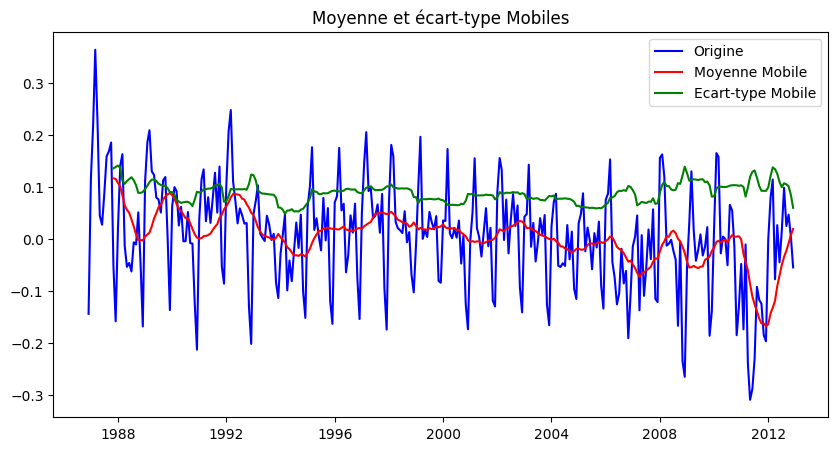

Statistiques ADF : -5.211072043552169
p-value : 8.345820281979527e-06
Valeurs Critiques :
	1%: -3.4524859843440754
	5%: -2.871288184343229
	10%: -2.571964047565425


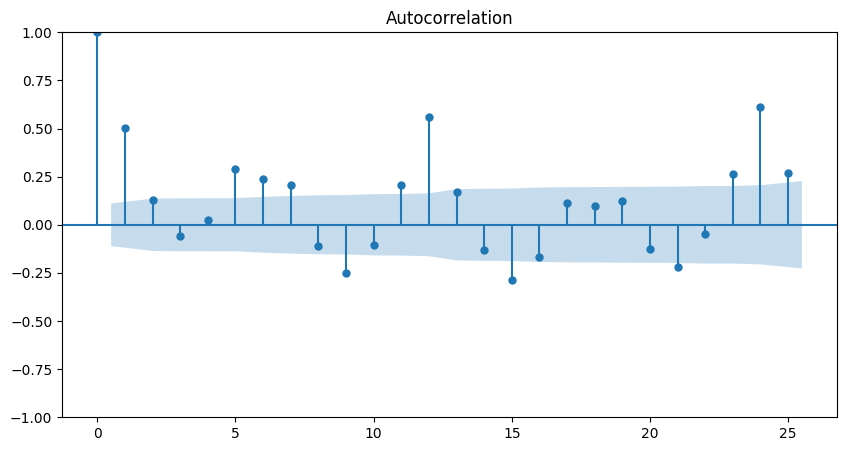

In [13]:
rolling_mean = log_siluriforme.rolling(window=12).mean()
df_log_minus_mean = log_siluriforme - rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationarity(df_log_minus_mean, 12)

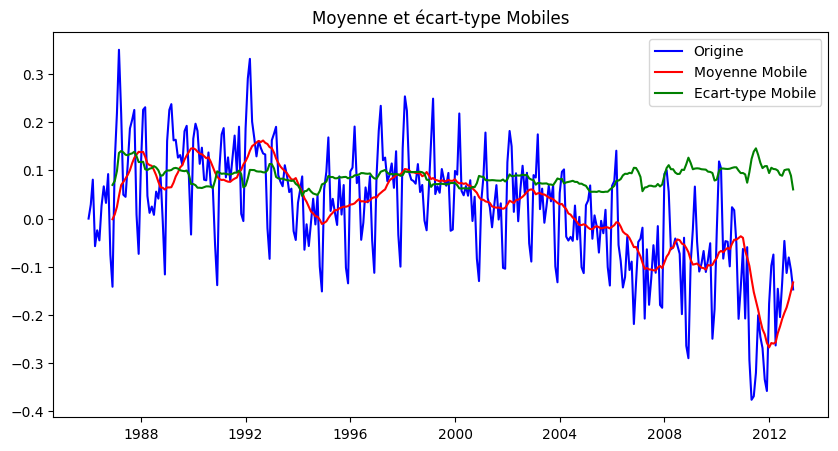

Statistiques ADF : -2.742715665135127
p-value : 0.06693374494084256
Valeurs Critiques :
	1%: -3.45169128009473
	5%: -2.8709394227049154
	10%: -2.5717780602423517


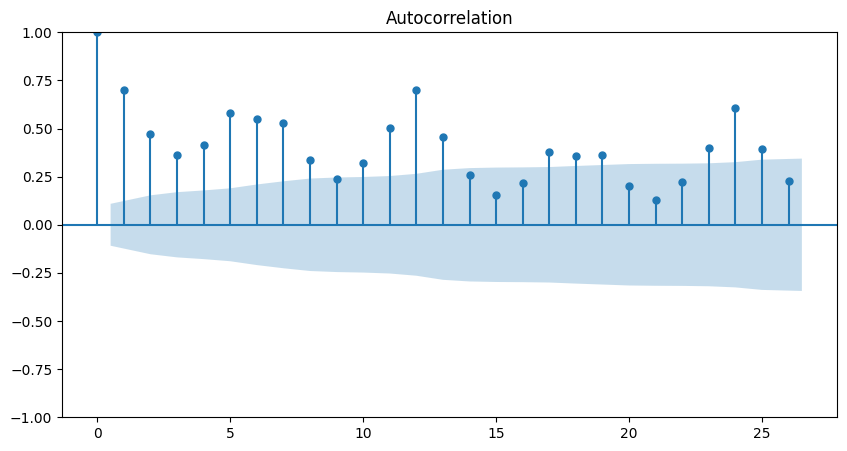

In [14]:
rolling_mean_exp_decay = log_siluriforme.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = log_siluriforme - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay, 12)

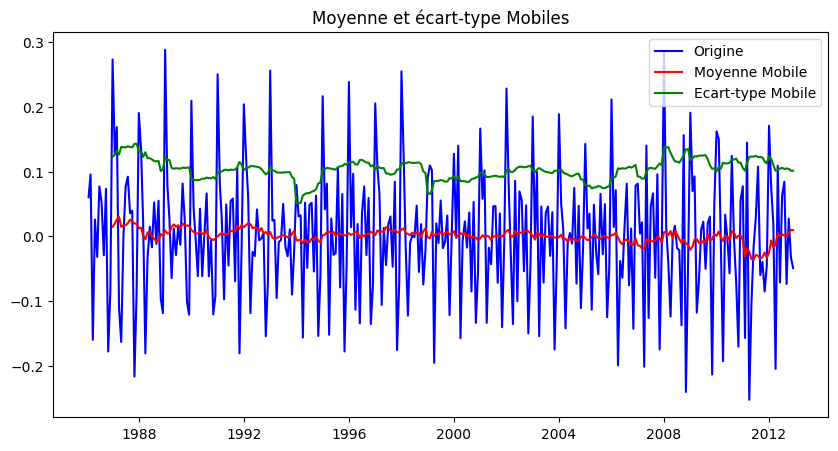

Statistiques ADF : -4.478290076941276
p-value : 0.00021518538273795212
Valeurs Critiques :
	1%: -3.451973573620699
	5%: -2.8710633193086648
	10%: -2.5718441306100512


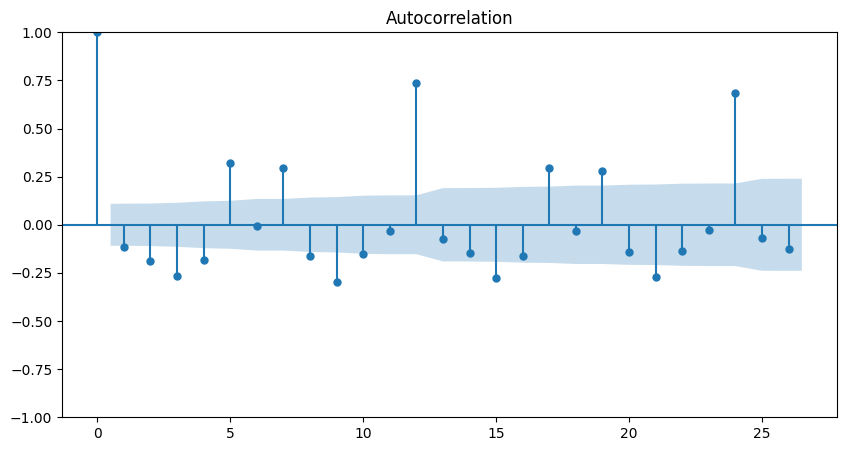

In [15]:
df_log_shift = log_siluriforme - log_siluriforme.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift, 12)

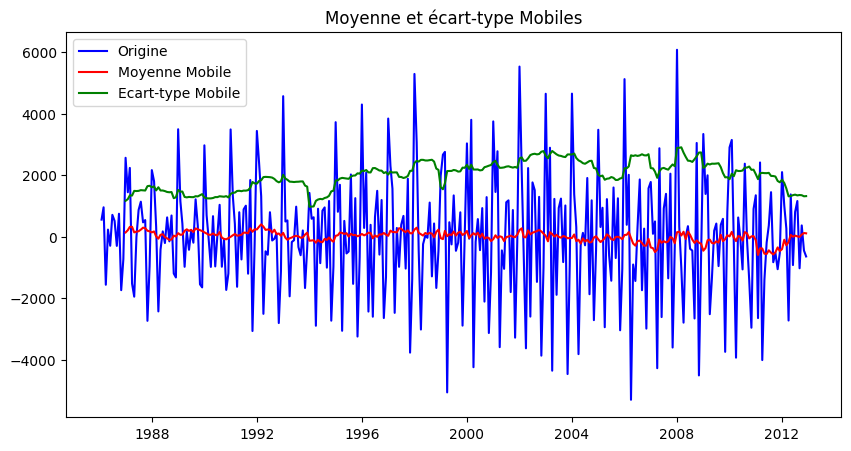

Statistiques ADF : -4.310935282406799
p-value : 0.00042523708517151434
Valeurs Critiques :
	1%: -3.451973573620699
	5%: -2.8710633193086648
	10%: -2.5718441306100512


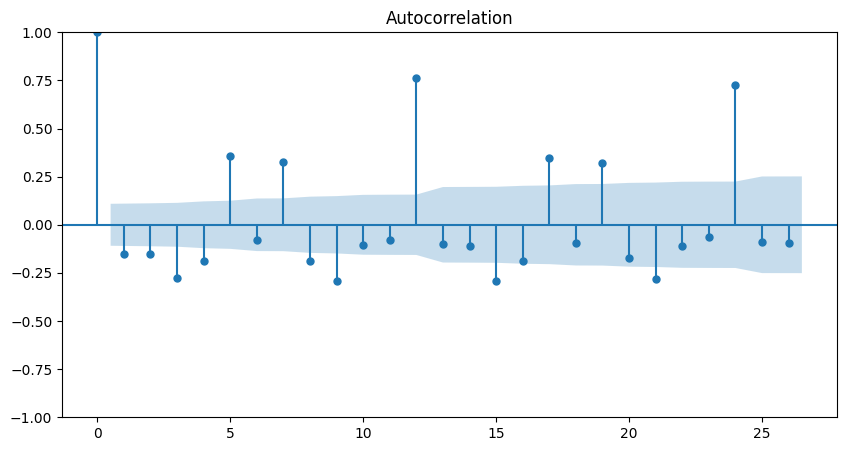

In [16]:
differenced = siluriforme.diff().dropna()
get_stationarity(differenced, 12)

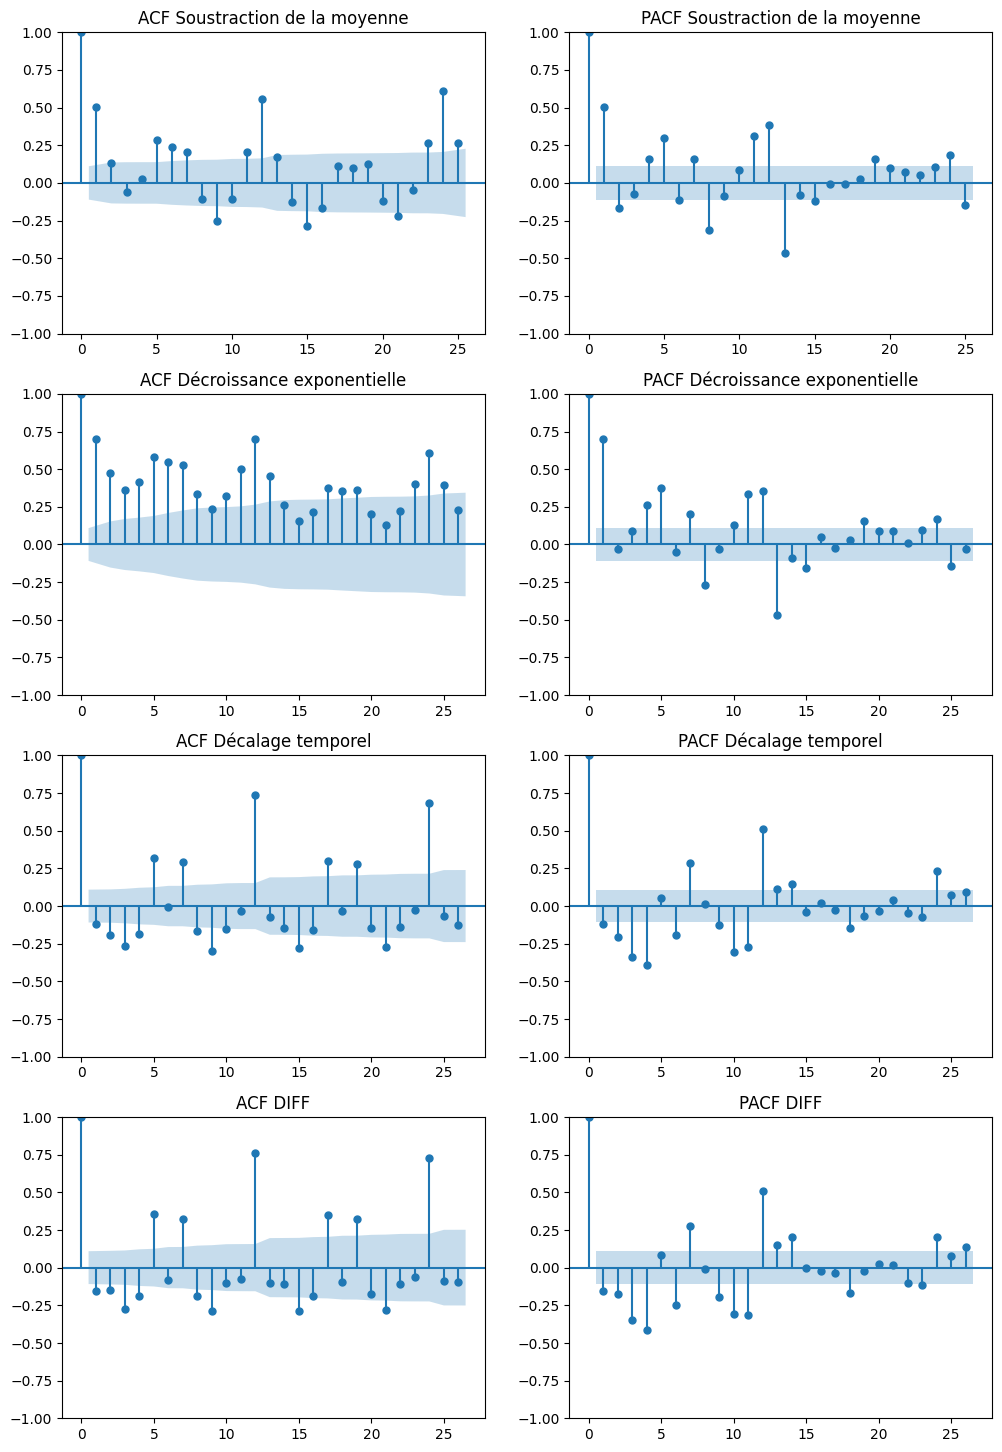

In [17]:
from statsmodels.tsa.api import graphics

def plot_acf_pacf(timeseries):
    fig = plt.figure(figsize=(12, 18))
    for index, (timeserie_title, timeserie) in enumerate(timeseries.items()):
        index = index * 2
        ax = fig.add_subplot(len(timeseries), 2, index + 1)
        ax.title.set_text(timeserie_title)
        graphics.plot_acf(timeserie, ax=ax)
        ax.title.set_text('ACF %s' % timeserie_title)

        ax = fig.add_subplot(len(timeseries), 2, index + 2)
        graphics.plot_pacf(timeserie, ax=ax)
        ax.title.set_text('PACF %s' % timeserie_title)

plot_acf_pacf({
    'Soustraction de la moyenne': df_log_minus_mean,
    'Décroissance exponentielle': df_log_exp_decay,
    'Décalage temporel': df_log_shift,
    'DIFF': differenced

})

p = 2
d = 1
q = 1
ARIMA(2,1,1)

In [18]:
train_data = siluriforme.loc['1986':'2000']
test_data = siluriforme.loc['2001':'2012']

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(train_data, order=(2,1,1), freq='MS')

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  180
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1571.066
Date:                Fri, 14 Mar 2025   AIC                           3150.132
Time:                        09:39:33   BIC                           3162.881
Sample:                    01-01-1986   HQIC                          3155.302
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5072      0.116      4.373      0.000       0.280       0.735
ar.L2         -0.2495      0.079     -3.143      0.002      -0.405      -0.094
ma.L1         -0.7687      0.112     -6.861      0.0

c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


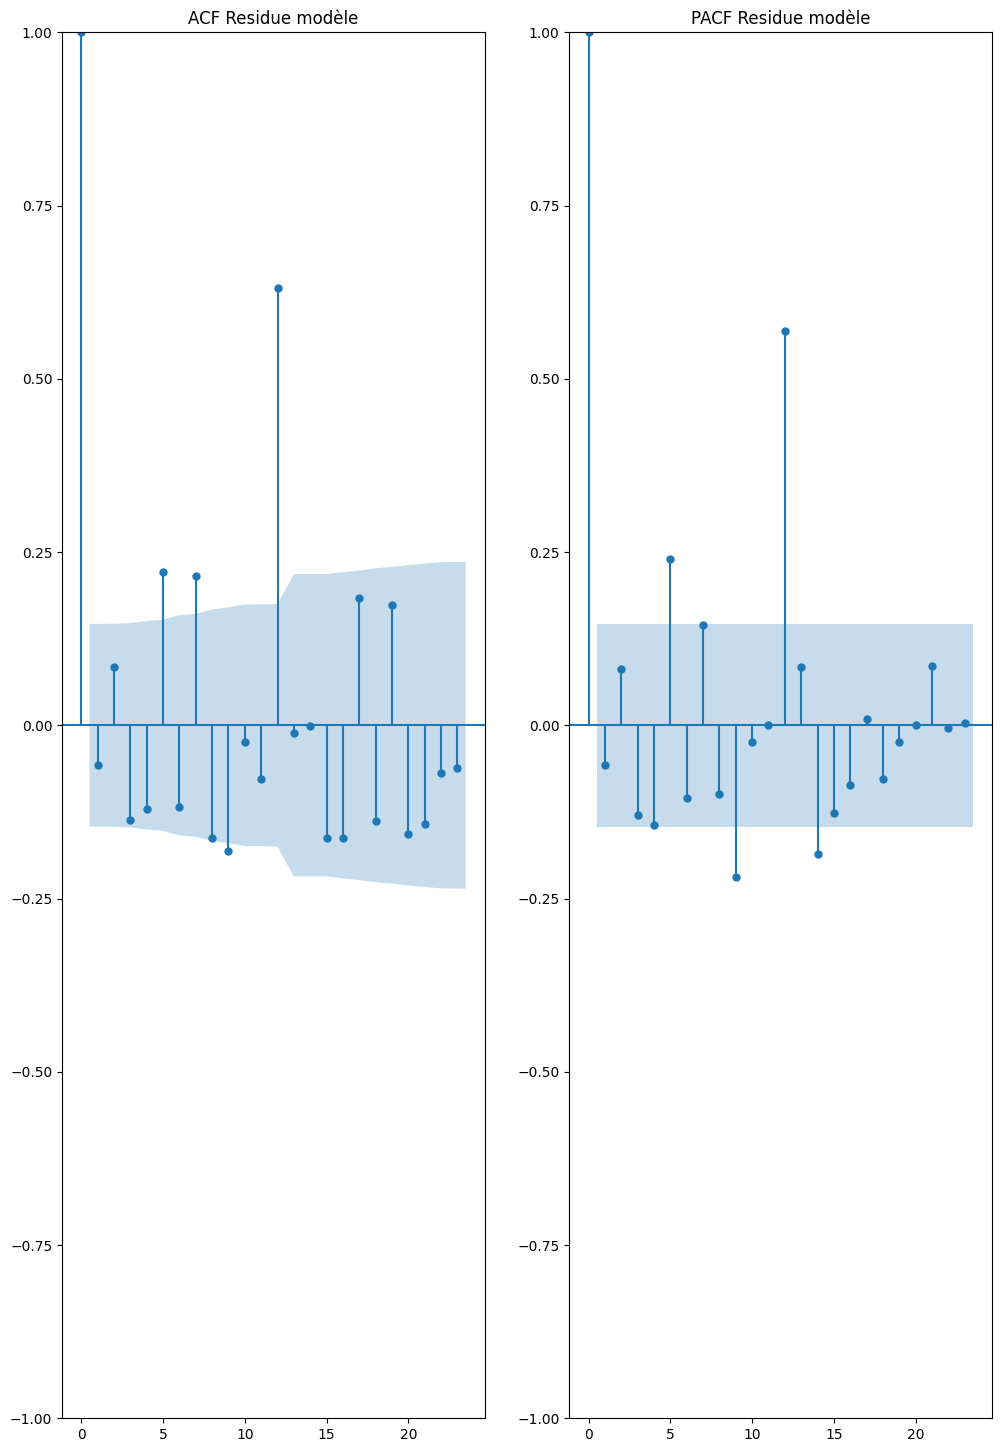

In [20]:
residuals = model_fit.resid
plot_acf_pacf({
    'Residue modèle': residuals
})

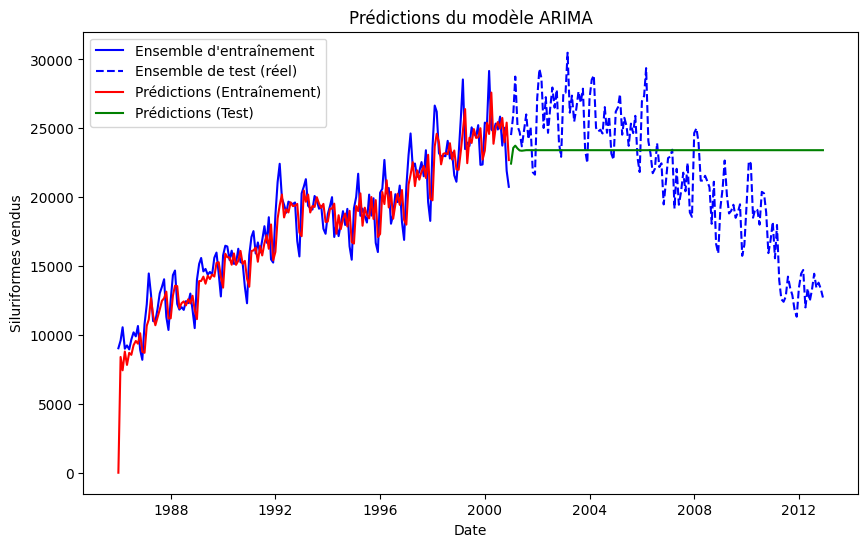

In [21]:
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
#plt.xlim(train_data.index[0], test_data.index[-1])
#plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Siluriformes vendus')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

Selon le modèle que j'ai trouvé les prédictions de test sont complétement ratés, j'obtiens une ligne droite. Les modèles peuvent ne pas être justes, ils faut donc les prendre avec des pincettes

Modéle prédictif avec la librairie pmdarima

In [22]:
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = siluriforme.loc['1986':'2000']
test_data = siluriforme.loc['2001':'2012']

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: F

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1528.689
Date:                Fri, 14 Mar 2025   AIC                           3075.378
Time:                        09:39:55   BIC                           3104.064
Sample:                    01-01-1986   HQIC                          3087.010
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7375      0.028    -26.225      0.000      -0.793      -0.682
ar.L2         -0.2502      0.035     -7.134      0.000      -0.319      -0.181
ar.L3         -0.6996      0.032    -22.123      0.0

c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


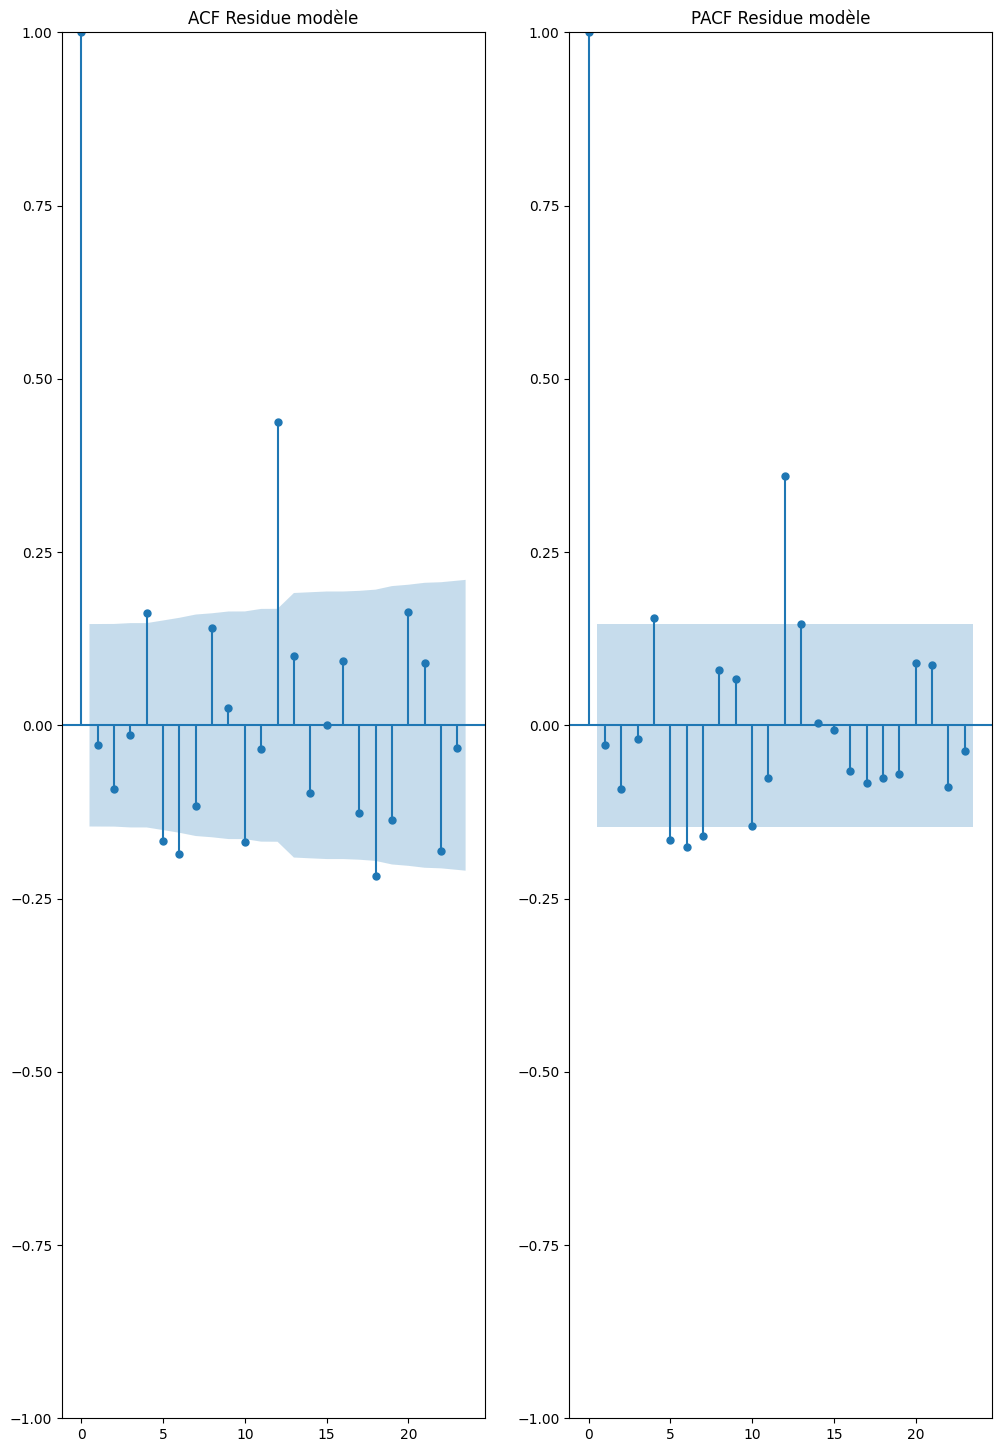

In [23]:
# Ajuster le modèle aux données
model.fit(train_data)
# Obtenir les résidus du modèle
residuals = model.resid()
plot_acf_pacf({
    'Residue modèle': residuals
})

c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Annee_3\Maths\Serie-Temporelle\serie-temporelle\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


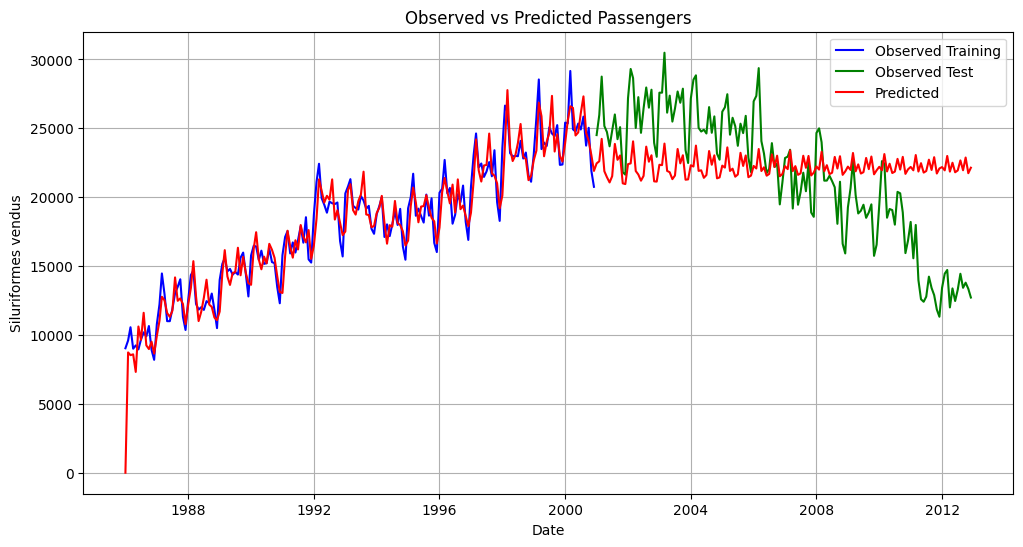

In [24]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pandas.concat([pandas.Series(train_pred, index=train_data.index),
                            pandas.Series(predicted, index=test_data.index)],
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Siluriformes vendus')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()

Le modèle généré avec la librairie garde la saisonalité cependant, ont observe une stationnarisation des données crée alors que les données observé indique clairement une décroissance du nombre de silriformes vendus.

Poisson-chat et loi normale

Entre 10 et 25 cm ?
Moins de 25 cm ?
Plus de 30 cm ?

In [28]:
from statistics import NormalDist

mu = 25
sigma = 7.5

dist = NormalDist(mu, sigma)

p_between_10_25 = dist.cdf(25) - dist.cdf(10)  # P(10 ≤ X ≤ 25)
p_less_25 = dist.cdf(25)               # P(X ≤ 25)
p_more_30 = 1 - dist.cdf(30)           # P(X ≥ 30)

p_between_10_25 = round(p_between_10_25, 3)
p_less_25 = round(p_less_25, 3)
p_more_30 = round(p_more_30, 3)

print(f"La proba qu'un poisson est une taille entre 10 et 25 cm est : P(10 ≤ X ≤ 25) = {p_between_10_25}")
print(f"La proba qu'un poisson est une taille de moins de 25 cm est : P(X ≤ 25) = {p_less_25}")
print(f"La proba qu'un poisson est une taille de plus 30 cm est : P(X ≥ 30) = {p_more_30}")


La proba qu'un poisson est une taille entre 10 et 25 cm est : P(10 ≤ X ≤ 25) = 0.477
La proba qu'un poisson est une taille de moins de 25 cm est : P(X ≤ 25) = 0.5
La proba qu'un poisson est une taille de plus 30 cm est : P(X ≥ 30) = 0.252
